# EJERCICIOS

In [124]:
import numpy as np
import joblib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import OneHotEncoder



In [125]:
warnings.filterwarnings("ignore", category=FutureWarning)

## EJERCICIO 1

Imagina que estás usando regresión polinomial. Trazas las curvas de aprendizaje y te das cuenta de que hay un espacio grande entre el error de entrenamiento y el error de validación. ¿Qué está pasando? Piensa en tres formas de poder arreglarlo

Si tengo mucho espacio entre el error de entrenamiento y el de validación, como en el ejercicio 2_8.3, puede indicar un sobreajuste, es decir, hemos sobreentrenado el modelo y actua muy bien sobre los datos de entrenamiento pero no sabe generalizar, de manera en la que con los nuevos datos, falla mucho.

En PRIA hemos visto varias formas de tratar este fallo, una de ellas es reducir el grado del poliniomio, así será menos flexible y capturará menos ruido en los datos de entrenamiento, forzando a que el modelo generalize mas. Otra cosa que podemos hacer es aumentar el volumen de los datos, con más datos, el modelo entrenará mejor y generalizará más. Por último podemos aplicar Lasso o Ridge, que sería como "frenar" la complejidad del modelo, estas regularizaciones limitan los coeficientes para que no sean muy grandes y se ajusten mejor a los datos de entrenamiento.

## EJERCICIO 2

Imagina que estás utilizando regresión de Ridge y observas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Deberías incrementar el hiperparámetro de regularización o reducirlo (α)?

Este es el caso contrario, estaríamos subajustando el modelo. Si reducimos el hiperparametro de la regularización, hacemos lo contrario que en el caso anterior, y penaliza menos los coeficientes grandes. Así el modelo es más flexible y se ajusta mejor a los datos.

## EJERCICIO 3

Ejercicio de Regresión con el Conjunto de Datos de Diabetes

* Objetivo: El objetivo de este ejercicio es desarrollar un modelo de regresión que pueda predecir la progresión de la diabetes un año después del inicio basándose en diversas mediciones clínicas.

* Datos: Utilizarás el conjunto de datos de diabetes proporcionado por Scikit-Learn, que contiene diez variables base (edad, sexo, índice de masa corporal, presión arterial y seis mediciones de suero sanguíneo) para 442 pacientes.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [126]:
dataset = load_diabetes(as_frame=True)
X, y = dataset.data, dataset.target

#### EXPLORAR LOS DATOS

Muestra los primero datos de X e y

In [127]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [128]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Usa .describe y .info para ver un poco de información

In [129]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [130]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [132]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


Representa cada una de la características

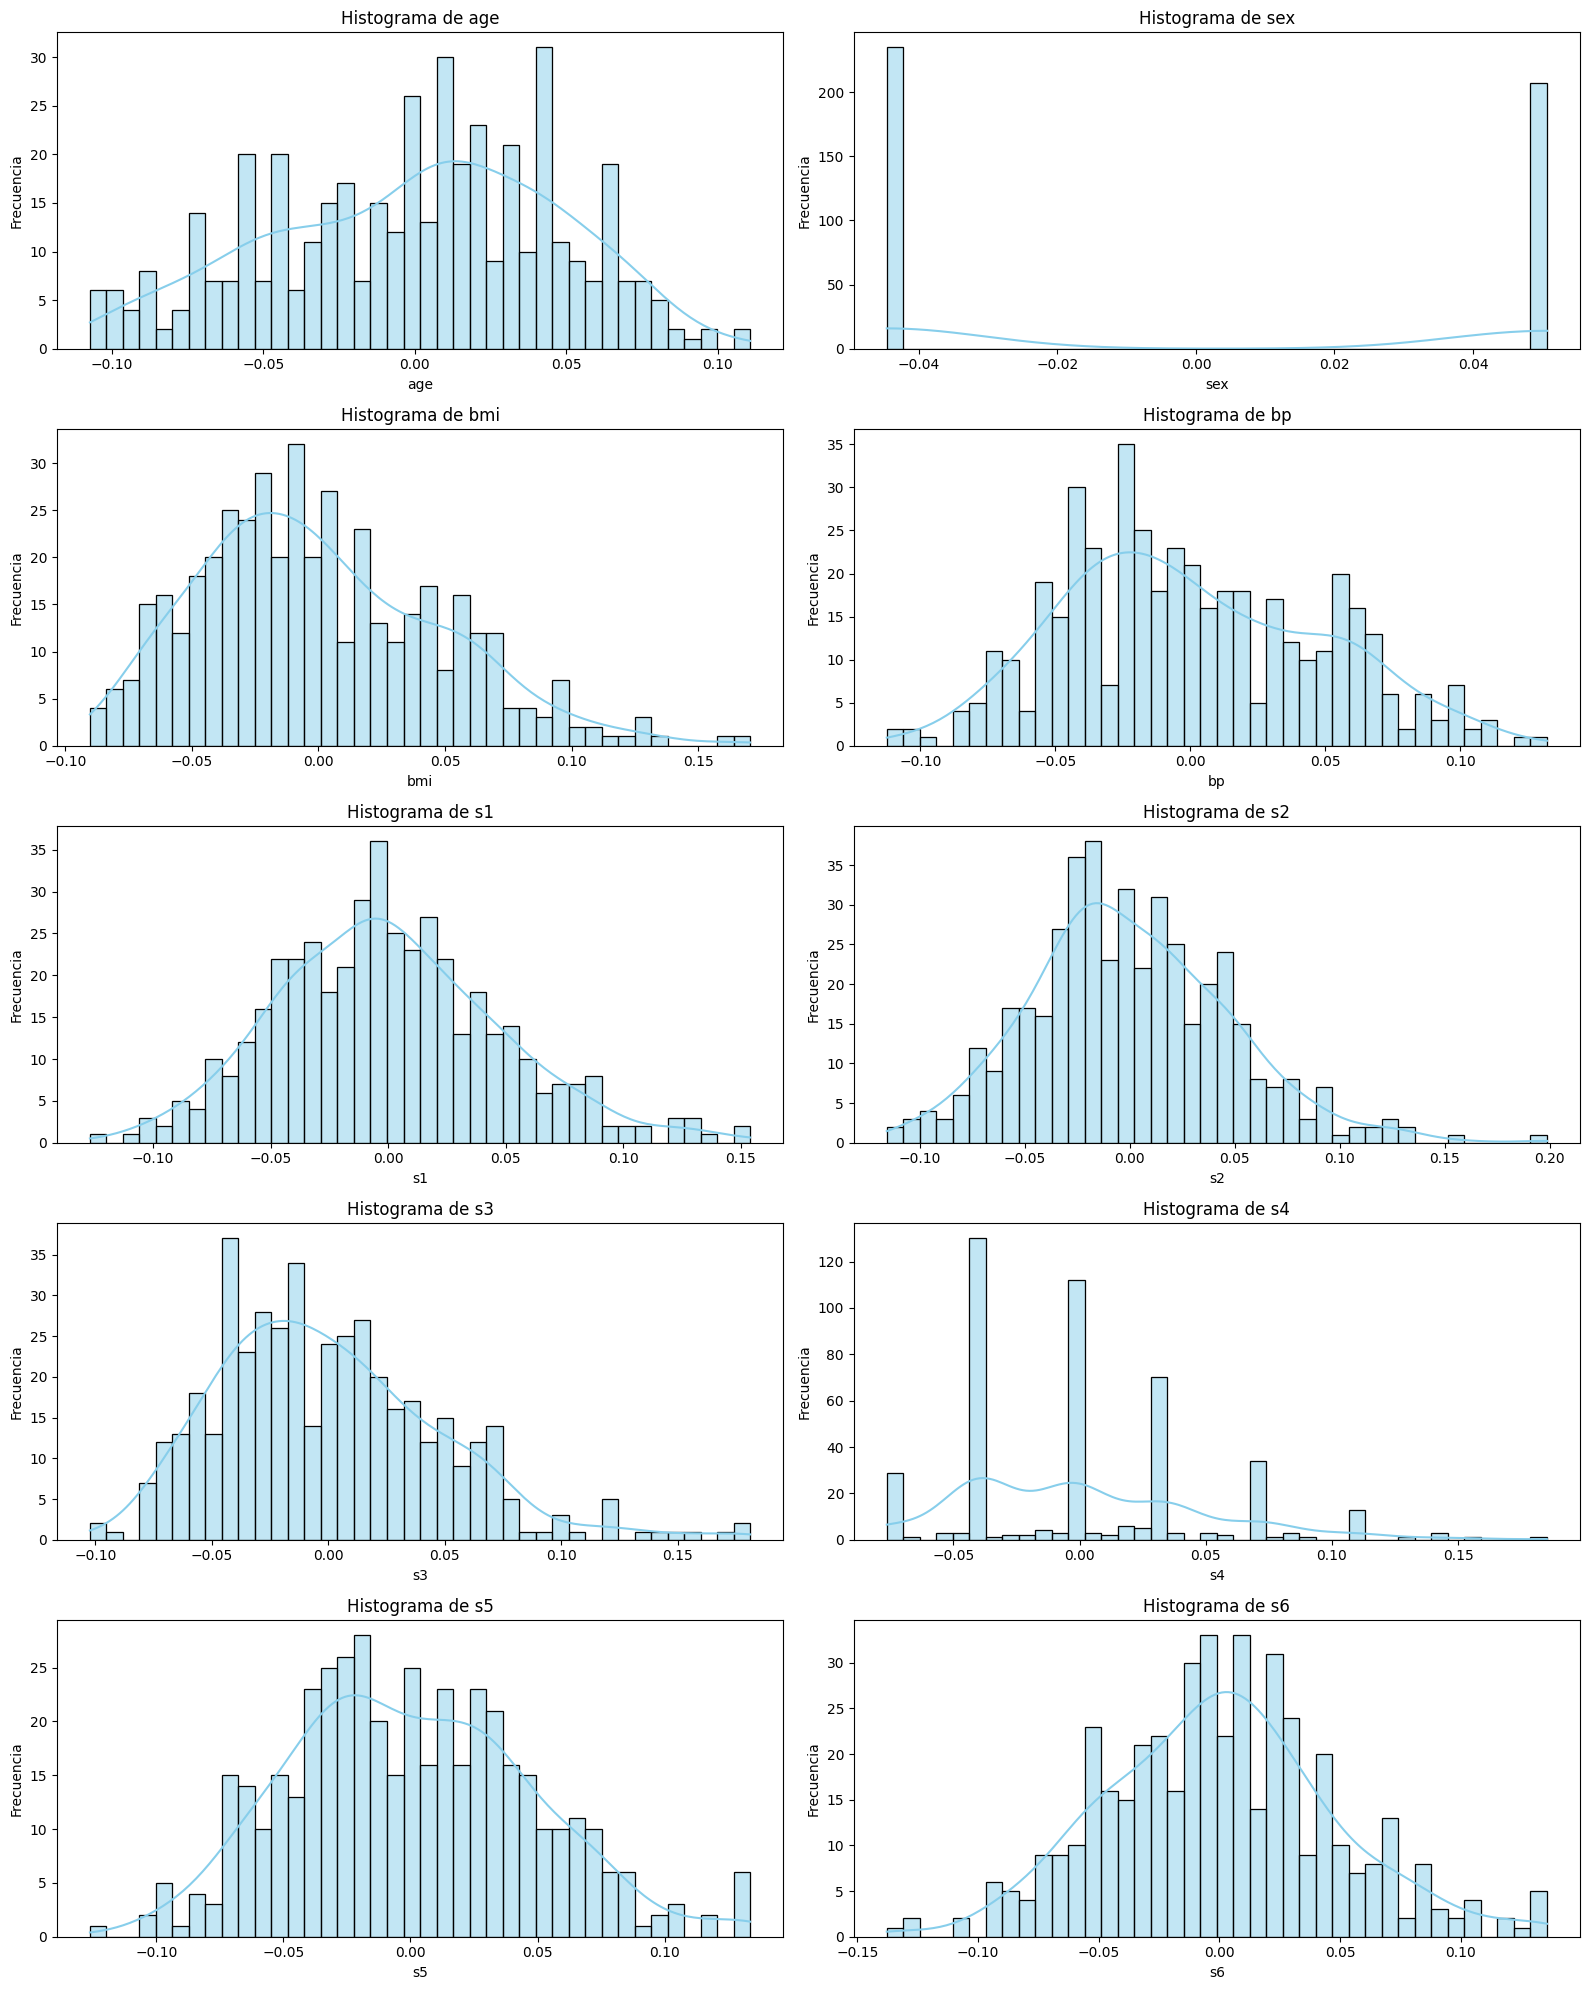

In [133]:
# Como en los anteriores ejercicios
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for idx, columna in enumerate(X.columns):
    sns.histplot(data=X, x=columna, bins=40, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Histograma de {columna}', fontsize=12)
    axes[idx].set_xlabel(columna)
    axes[idx].set_ylabel('Frecuencia')

for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

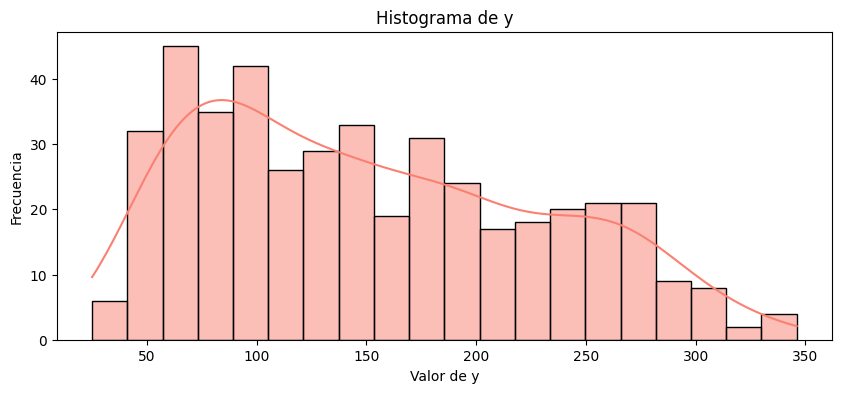

In [134]:
# Variable target
plt.figure(figsize=(10, 4))
sns.histplot(y, bins=20, kde=True, color="salmon")

plt.title('Histograma de y')
plt.xlabel('Valor de y')
plt.ylabel('Frecuencia')

plt.show()

Muestra la matriz de correlaciones

In [135]:
# Combinar X e y en un solo DataFrame
data = X.copy()
data['target'] = y

# Calcular la matriz de correlación
correlaciones = data.corr(numeric_only=True)

correlaciones.style.background_gradient()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Parece que la variable mas correlacionada con y es el bmi, aunque s5,bp y s4 también son altos.

#### DIVIDIR LOS DATOS

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

In [137]:
# En realidad no es necesario podemos usar directamente StandardScaler()
numericas_pipeline = make_pipeline(
    StandardScaler() 
)

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea y entrena el modelo con diferentes algoritmos y muestra los resultados obtenidos con validación cruzada y utilizando la métrica RMSE para medir el error

In [138]:
from sklearn.metrics import mean_squared_error

# Definir los modelos (He elegido los que estaban ya importados)
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Regresión Logística": LogisticRegression(random_state=42, max_iter=1000),
    "Random forest":RandomForestRegressor(random_state=42),
    "Ridge":Ridge(),
    "Lasso":Lasso()
}

for nombre, modelo in modelos.items():
    print(f"Modelo {nombre}")

    pipeline = make_pipeline(numericas_pipeline,modelo)
    
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)
    
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    print(f"- RMSE: {rmse:.2f}")

Modelo Regresión Lineal
- RMSE: 56.05
Modelo Regresión Logística


/home/iabd/Escritorio/SAPA/SAPA/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


- RMSE: 73.06
Modelo Random forest
- RMSE: 59.28
Modelo Ridge
- RMSE: 55.98
Modelo Lasso
- RMSE: 55.94


Calcula el máximo de y (del dataset original) y el mínimo de y (del dataset original) para ver con prespectiva si RMSE es aceptable o no.

In [139]:
max_y = np.max(y)
min_y = np.min(y)

print(f"Máximo de y: {max_y:.2f}")
print(f"Mínimo de y: {min_y:.2f}")

Máximo de y: 346.00
Mínimo de y: 25.00


Rango: 346−25=321
Hay bastante desviación entre los valores RMSE de los modelos y el rango de y, es decir hay un error de entre el 17 y el 22%

### OPTIMIZACIÓN DEL MODELO

Vamos a suponer que el mejor modelo que has obtenido es con Ridge y vamoas a aplicar búsqueda exhaustiva para el parámetro alpha.

In [140]:
pipeline = make_pipeline(numericas_pipeline,Ridge())

param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 200.0]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'ridge__alpha': 10.0}


Evalúa este mejor modelo en el conjunto de pruebas

In [141]:
mejor_modelo = grid_search.best_estimator_
y_pred = cross_val_predict(mejor_modelo, X_test, y_test, cv=5)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"- RMSE: {rmse:.2f}")

- RMSE: 55.79


Algo ha mejorado pero poquito

### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [142]:
joblib.dump(mejor_modelo, "./modelo_diabetes.pkl")


['./modelo_diabetes.pkl']

Opcional: hacer un script de Python que pida los datos y te prediga el resultado

## EJERCICIO 4

Usa regresión logística para crear un modelo que deduzca el tipo de flor iris

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [143]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

#### EXPLORAR LOS DATOS

Visualiza los datos

In [144]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [145]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [146]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [147]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: target
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [148]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [149]:
y.describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

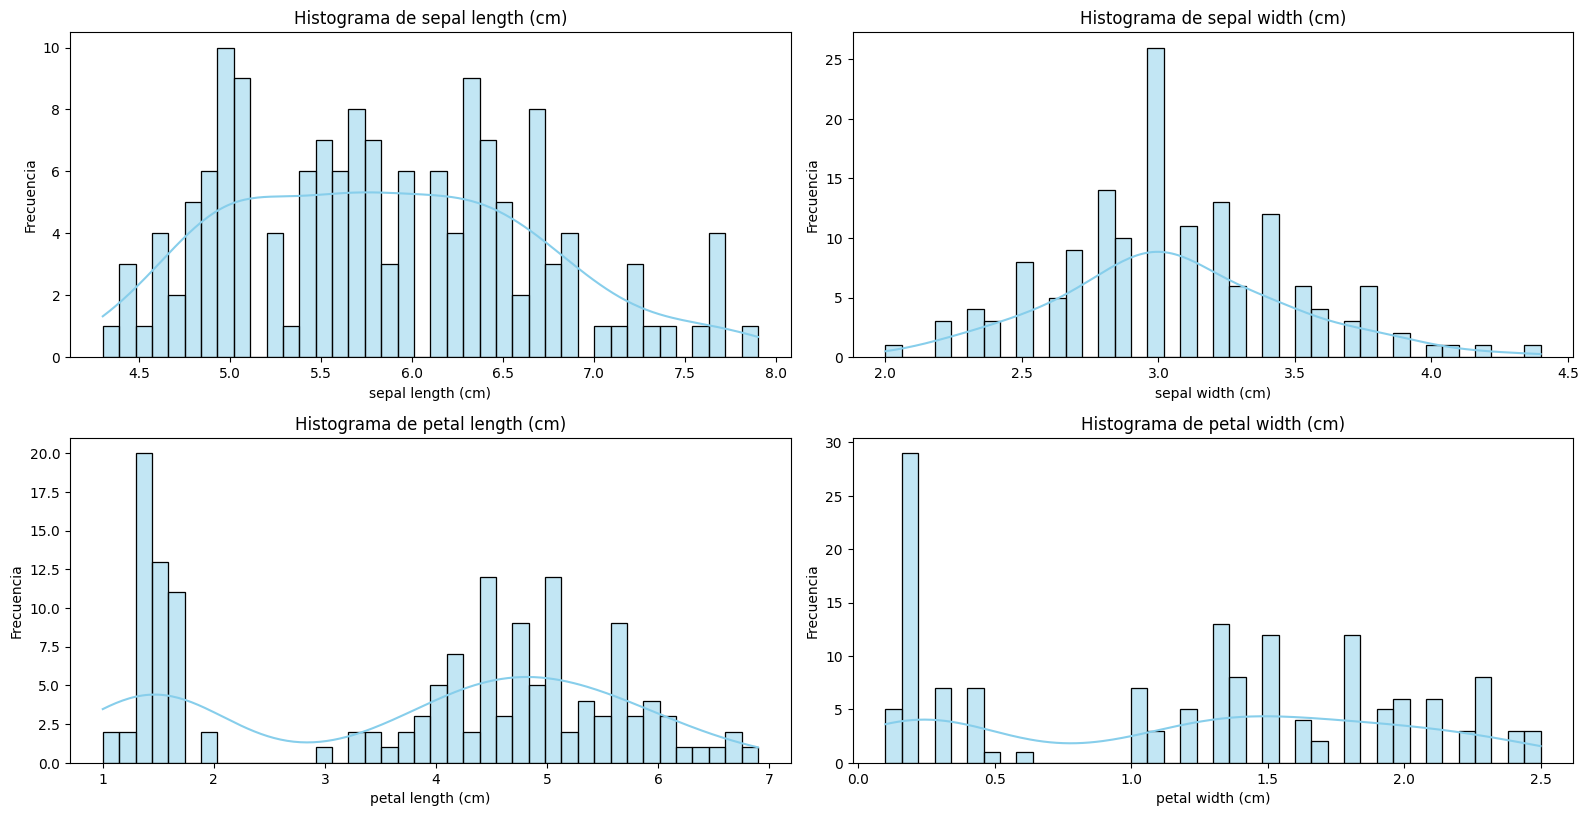

In [150]:
#Como en los demás ejercicios
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for idx, columna in enumerate(X.columns):
    sns.histplot(data=X, x=columna, bins=40, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Histograma de {columna}', fontsize=12)
    axes[idx].set_xlabel(columna)
    axes[idx].set_ylabel('Frecuencia')

for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

# Para que no se me junten
plt.tight_layout()
plt.show()

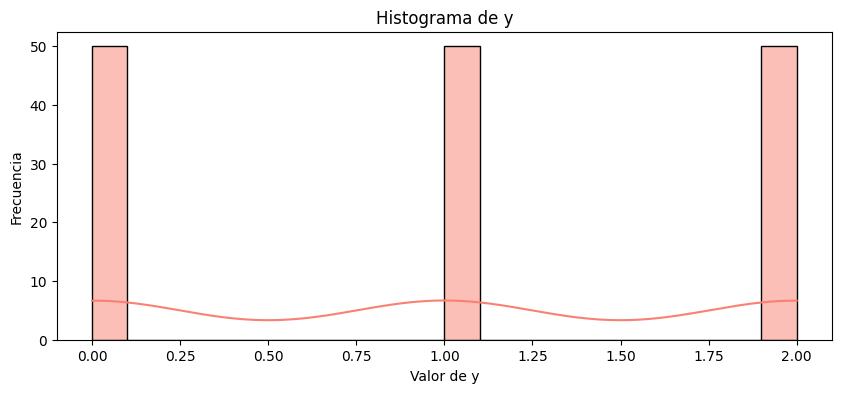

In [151]:
plt.figure(figsize=(10, 4))
sns.histplot(y, bins=20, kde=True, color="salmon")

plt.title('Histograma de y')
plt.xlabel('Valor de y')
plt.ylabel('Frecuencia')

plt.show()

Representa la matriz de correlaciones

In [152]:
# Combinar X e y en un solo DataFrame
data = X.copy()
data['target'] = y

# Calcular la matriz de correlación
correlaciones = data.corr(numeric_only=True)

correlaciones.style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Las variables más correlacionadas con la variable objetivo son petal width, petal length y sepal length, son todas bastante altas.

#### DIVIDIR LOS DATOS

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

Solo hay que estandarizar las columnas y por lo tanto se puede hacer directamente en la pipeline que define el modelo en el siguiente punto

### SELECCIÓN Y ENTRENAMIENTO DEL MODELO

Crear y entrenar el modelo con regresión logística y validacion cruzada ¿cuál es la exactitud en el conjunto de entrenamiento?

In [154]:
pipeline_iris = make_pipeline(StandardScaler(),LogisticRegression())
pipeline_iris.fit(X_train, y_train)

y_train_predict = cross_val_predict(pipeline_iris, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, y_train_predict)

print(f"Accuracy:{accuracy:.4f}")

Accuracy:0.9583


Calcula matriz de confusion, precision, recall y f1 en el conjunto de entrenamiento

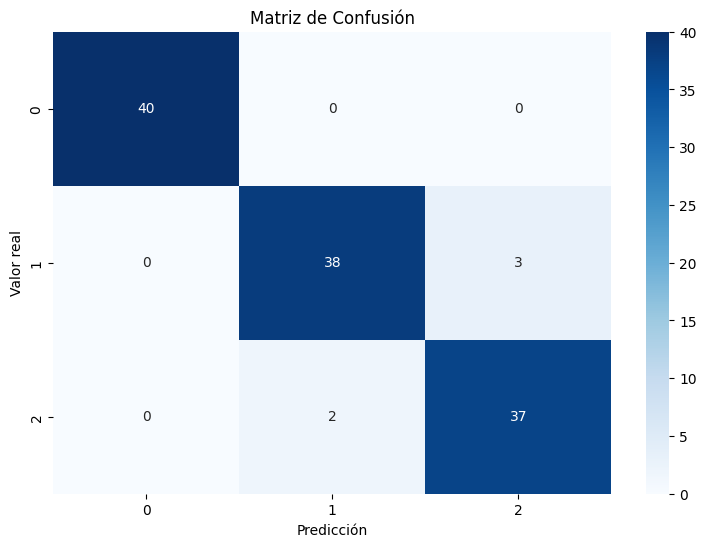

Exactitud: 0.9583
Precisión: 0.9583
Sensibilidad: 0.9585
F1: 0.9583


In [155]:
matriz = confusion_matrix(y_train,y_train_predict)

accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict, average='macro')
recall = recall_score(y_train, y_train_predict, average='macro')
f1 = f1_score(y_train, y_train_predict, average='macro')


plt.figure(figsize=(9, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad: {recall:.4f}")
print(f"F1: {f1:.4f}")

¿Qué podemos deducir?

El modelo tiene buenos valores, el modelo parece efectivo.

### OPTIMIZACIÓN DEL MODELO

Aplica búsqueda exhaustiva con los hiperparámetros de LogisticRegression (C y solver) y guarda el mejor modelo en una variable.

In [156]:
# No tengo que hacer otra pipeline, ya es LogisticRegression
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'logisticregression__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline_iris, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

mejor_modelo = grid_search.best_estimator_


Mejores hiperparámetros: {'logisticregression__C': 1.0, 'logisticregression__solver': 'saga'}


/home/iabd/Escritorio/SAPA/SAPA/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iabd/Escritorio/SAPA/SAPA/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iabd/Escritorio/SAPA/SAPA/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iabd/Escritorio/SAPA/SAPA/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iabd/Escritorio/SAPA/SAPA/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

### EVALUACIÓN DEL MODELO

Evalua este mejor modelo en el conjunto de pruebas (exactitud, matriz de confusión, precision, recall y f1)

Exactitud: 1.0000
Precisión: 1.0000
Sensibilidad: 1.0000
F1: 1.0000


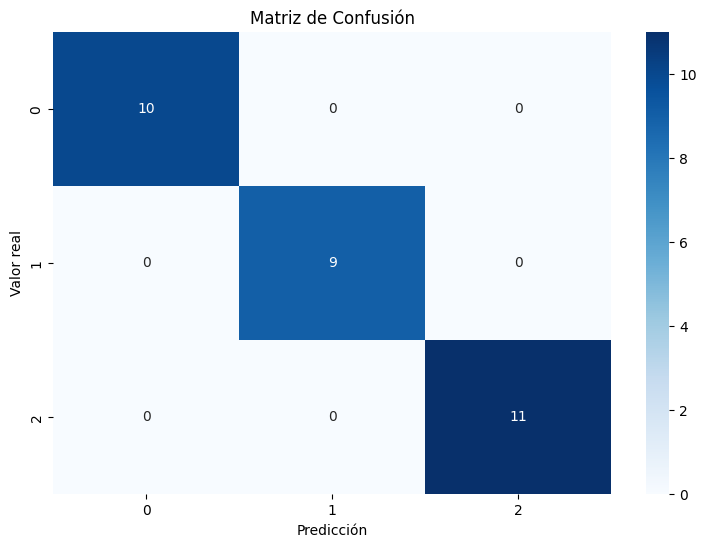

In [157]:
y_test_predict = mejor_modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predict)

matriz_confusion = confusion_matrix(y_test, y_test_predict)

precision = precision_score(y_test, y_test_predict, average='macro')  
recall = recall_score(y_test, y_test_predict, average='macro')  
f1 = f1_score(y_test, y_test_predict, average='macro') 

print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad: {recall:.4f}")
print(f"F1: {f1:.4f}")

plt.figure(figsize=(9, 6)) 
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [158]:
joblib.dump(mejor_modelo, "./modelo_iris.pkl")


['./modelo_iris.pkl']

## EJERCICIO 5

Intenta predecir las emisiones de CO2 con el menor error posible (sigue todos los pasos incluido crear un script para que haga predicciones).

Prueba diferentes modelos para intentar construir el mejor modelo posible (explica todos los pasos que das hasta llegar a la solución, quiero ver también los modelos que pruebas y luego los rechazas)

Dataset: https://www.kaggle.com/datasets/midhundasl/co2-emission-of-cars-dataset

In [159]:
emisiones = pd.read_csv("CO2.csv")

X = emisiones.drop('CO2', axis=1)
y = emisiones['CO2']

In [160]:
X.head()

,Car,Model,Volume,Weight,Unnamed: 5
0,Toyota,Aygo,1000,790,NaN
1,Mitsubishi,Space Star,1200,1160,NaN
2,Skoda,Citigo,1000,929,NaN
3,Fiat,500,900,865,NaN
4,Mini,Cooper,1500,1140,NaN


In [161]:
y.head()

0     99
1     95
2     95
3     90
4    105
Name: CO2, dtype: int64

In [162]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ KB


In [163]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 36 entries, 0 to 35
Series name: CO2
Non-Null Count  Dtype
--------------  -----
36 non-null     int64
dtypes: int64(1)
memory usage: 420.0 bytes


In [164]:
X.describe()

,Volume,Weight,Unnamed: 5
count,36.000000,36.000000,0.0
mean,1611.111111,1292.277778,NaN
std,388.975047,242.123889,NaN
min,900.000000,790.000000,NaN
25%,1475.000000,1117.250000,NaN
50%,1600.000000,1329.000000,NaN
75%,2000.000000,1418.250000,NaN
max,2500.000000,1746.000000,NaN


In [165]:
y.describe()

count     36.000000
mean     102.027778
std        7.454571
min       90.000000
25%       97.750000
50%       99.000000
75%      105.000000
max      120.000000
Name: CO2, dtype: float64

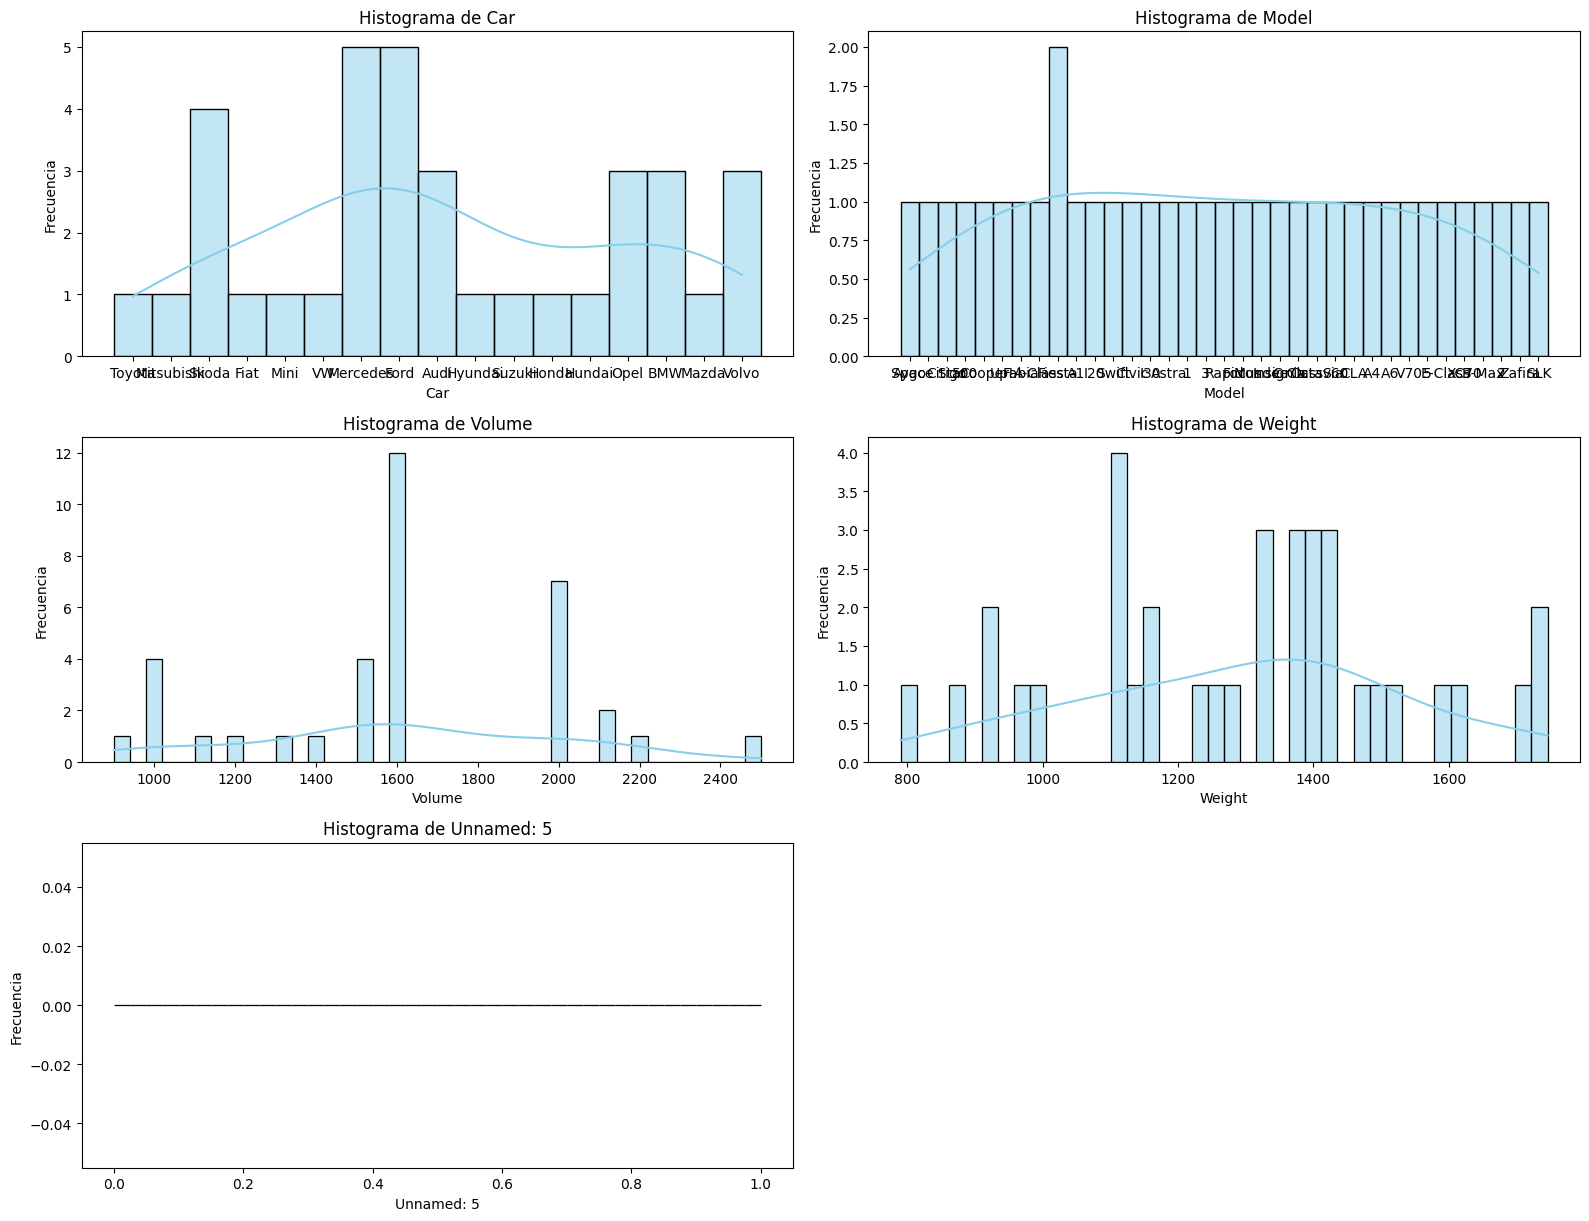

In [166]:
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for idx, columna in enumerate(X.columns):
    sns.histplot(data=X, x=columna, bins=40, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Histograma de {columna}', fontsize=12)
    axes[idx].set_xlabel(columna)
    axes[idx].set_ylabel('Frecuencia')

for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

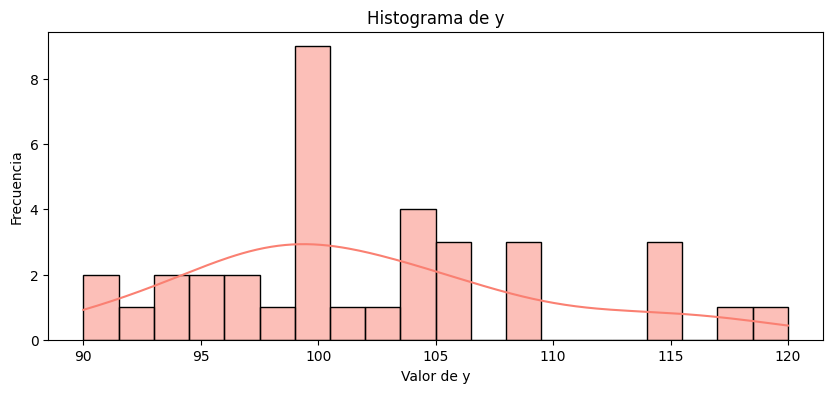

In [167]:
plt.figure(figsize=(10, 4))
sns.histplot(y, bins=20, kde=True, color="salmon")

plt.title('Histograma de y')
plt.xlabel('Valor de y')
plt.ylabel('Frecuencia')

plt.show()

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [169]:
# las numericas scaler y categoricas encoder
pipeline_emisiones = ColumnTransformer([
    ("scaler",StandardScaler(),["Volume","Weight"]),
    ("encoder",OneHotEncoder(handle_unknown="ignore"),["Car","Model"])
])

In [170]:
modelos = {
    "Regresión logistica":LogisticRegression(random_state=42, max_iter=1000), # el warning de max_iter ignorar, es para obtener mejores resultados si lo subimos
    "SGDRegressor":SGDRegressor(random_state=42),
    "Ridge":Ridge(random_state=42),
    "Lasso":Lasso(random_state=42),
    "SVR":SVR(),
    "Random forest":RandomForestRegressor(random_state=42)
}

for nombre, modelo in modelos.items():
    print(f"Modelo {nombre}")

    pipeline = make_pipeline(pipeline_emisiones,modelo)
    
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)
    
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    print(f"- RMSE: {rmse:.2f}")

Modelo Regresión logistica
- RMSE: 7.11
Modelo SGDRegressor
- RMSE: 64.22
Modelo Ridge
- RMSE: 6.01
Modelo Lasso


/home/iabd/Escritorio/SAPA/SAPA/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/iabd/Escritorio/SAPA/SAPA/.conda/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/iabd/Escritorio/SAPA/SAPA/.conda/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/iabd/Escritorio/SAPA/SAPA/.conda/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn

- RMSE: 6.08
Modelo SVR
- RMSE: 6.70
Modelo Random forest
- RMSE: 6.37


El que menos RMSE me da es Ridge, es el que optimizaré.

In [171]:
pipeline = make_pipeline(pipeline_emisiones,Ridge())
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 200.0],
    'ridge__max_iter': [5000, 10000],
    'ridge__solver': ['lsqr', 'auto'],
}

# Busqueda en grid (también existe RidgeCV)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'ridge__alpha': 10.0, 'ridge__max_iter': 5000, 'ridge__solver': 'lsqr'}


In [172]:
mejor_modelo = grid_search.best_estimator_

y_train_pred = mejor_modelo.predict(X_train)

y_test_pred = mejor_modelo.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) 
print(f"RMSE en entrenamiento: {rmse_train:.2f}")

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
print(f"RMSE en prueba: {rmse_test:.2f}")

RMSE en entrenamiento: 4.59
RMSE en prueba: 8.51


In [173]:
joblib.dump(mejor_modelo, "./modelo_emisiones.pkl")

['./modelo_emisiones.pkl']